In [ ]:
import warnings
warnings.filterwarnings('ignore')

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform)
batch_size = 16
data_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

images, labels = next(iter(data_loader))
print("Форма батча изображений:", images.shape)
print("Метки батча:", labels)

def imshow(img, title=None, ax=None):
    img = img / 2 + 0.5
    npimg = img.numpy()
    if ax is None:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        if title:
            plt.title(title)
        plt.axis('off')
    else:
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        if title:
            ax.set_title(title)
        ax.axis('off')


Форма батча изображений: torch.Size([16, 3, 128, 128])
Метки батча: tensor([4, 8, 4, 6, 1, 4, 3, 7, 3, 2, 6, 4, 1, 9, 0, 9])


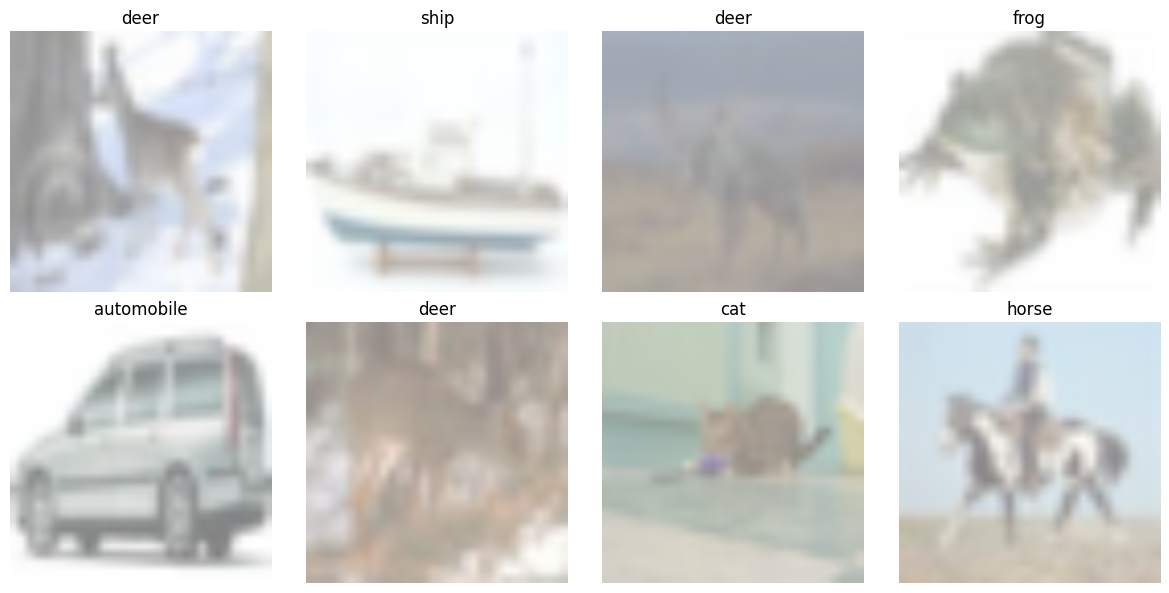

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    imshow(images[i], f'{classes[labels[i]]}')
plt.tight_layout()
plt.show()

In [ ]:
# RandomHorizontalFlip - Случайное отражение изображения по горизонтали с вероятностью 50%
transform_hflip = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor()
])

# ColorJitter - Изменение яркости, контраста и насыщенности изображения
transform_color = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ColorJitter(
        brightness=0.4,
        contrast=0.4,
        saturation=0.4,
        hue=0.2
    ),
    transforms.ToTensor()
])

# RandomRotation - Случайное вращение изображения на угол от 0 до 30 градусов
transform_rotation = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

# RandomAffine: Случайное аффинное преобразование
transform_affine = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.8, 1.2),
        shear=10           # наклон
    ),
    transforms.ToTensor()
])

# GaussianBlur - Применение гауссового размытия
transform_blur = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
    transforms.ToTensor()
])


1. RandomHorizontalFlip


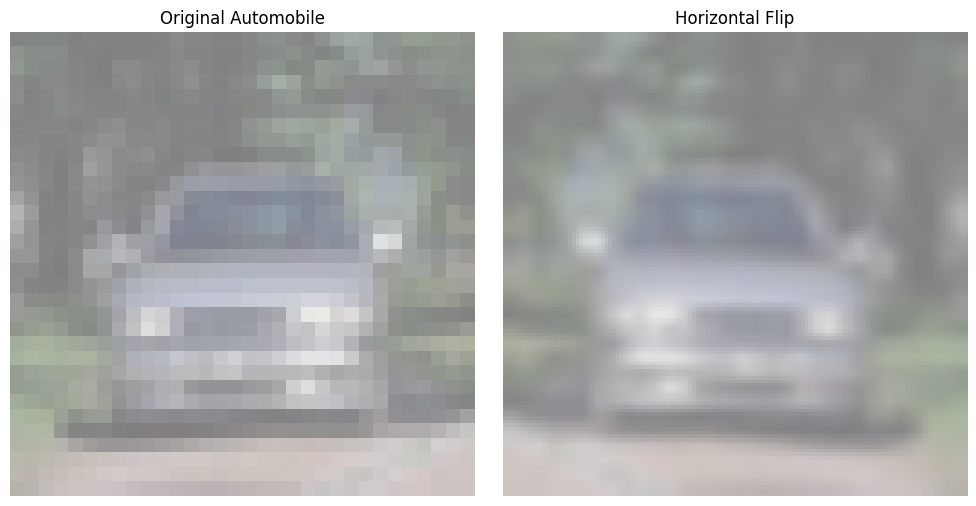

In [ ]:
class_examples = {class_name: None for class_name in classes}

for images, labels in basic_loader:
    label_idx = labels[0].item()
    class_name = classes[label_idx]

    if class_examples[class_name] is None:
        class_examples[class_name] = (images[0], labels[0])

print("\n1. RandomHorizontalFlip")
auto_img, auto_label = class_examples['automobile']
auto_pil = transforms.ToPILImage()(auto_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
imshow(auto_img, 'Original Automobile', axes[0])
imshow(transform_hflip(auto_pil), 'Horizontal Flip', axes[1])
plt.tight_layout()
plt.show()



2. ColorJitter


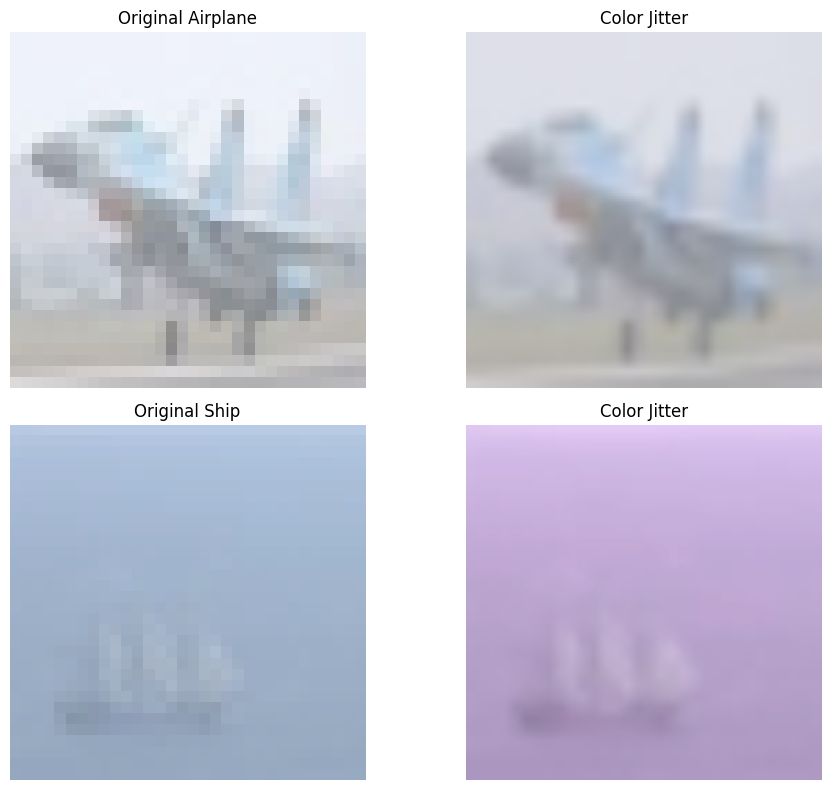

In [ ]:
print("\n2. ColorJitter")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

airplane_img, airplane_label = class_examples['airplane']
airplane_pil = transforms.ToPILImage()(airplane_img)
imshow(airplane_img, 'Original Airplane', axes[0, 0])
imshow(transform_color(airplane_pil), 'Color Jitter', axes[0, 1])

ship_img, ship_label = class_examples['ship']
ship_pil = transforms.ToPILImage()(ship_img)
imshow(ship_img, 'Original Ship', axes[1, 0])
imshow(transform_color(ship_pil), 'Color Jitter', axes[1, 1])

plt.tight_layout()
plt.show()


3. RandomRotation


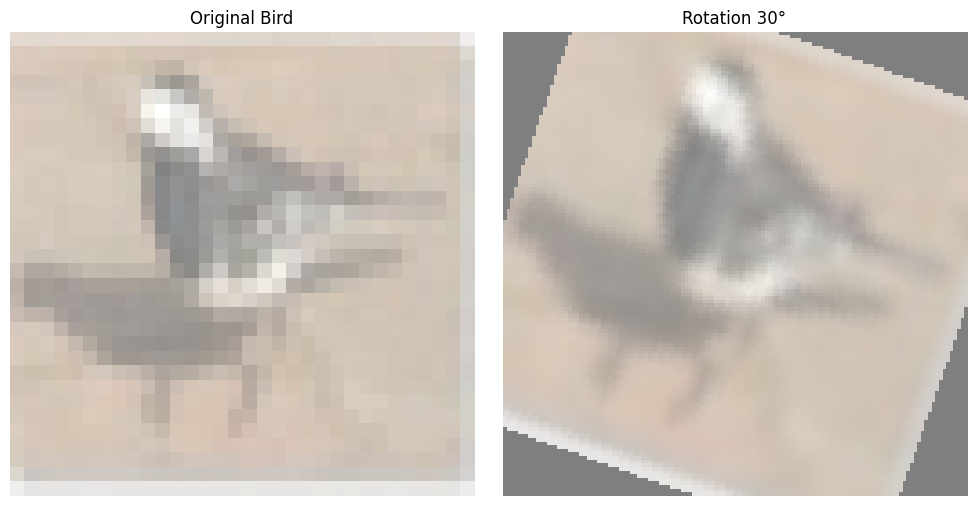

In [ ]:
print("\n3. RandomRotation")
bird_img, bird_label = class_examples['bird']
bird_pil = transforms.ToPILImage()(bird_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
imshow(bird_img, 'Original Bird', axes[0])
imshow(transform_rotation(bird_pil), 'Rotation 30°', axes[1])
plt.tight_layout()
plt.show()


4. RandomAffine


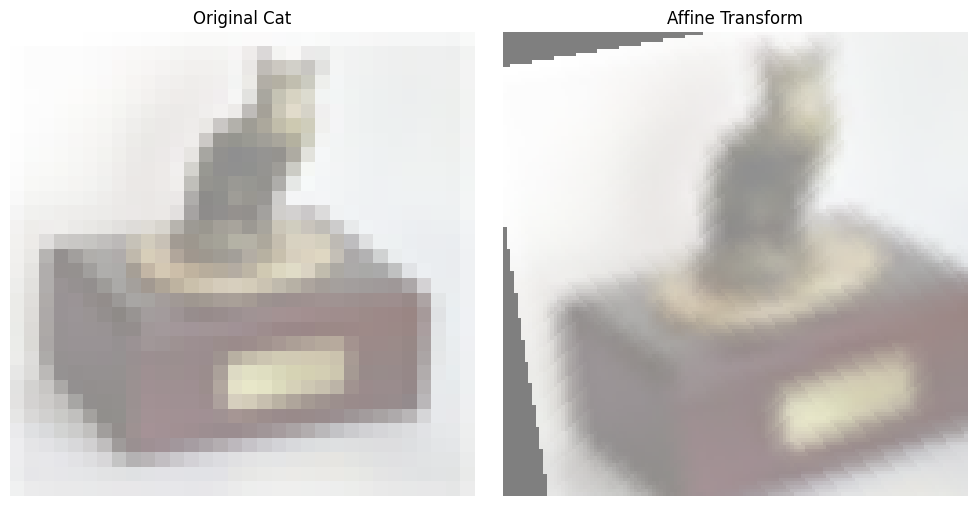

In [ ]:
print("\n4. RandomAffine")
cat_img, cat_label = class_examples['cat']
cat_pil = transforms.ToPILImage()(cat_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
imshow(cat_img, 'Original Cat', axes[0])
imshow(transform_affine(cat_pil), 'Affine Transform', axes[1])
plt.tight_layout()
plt.show()


5. GaussianBlur


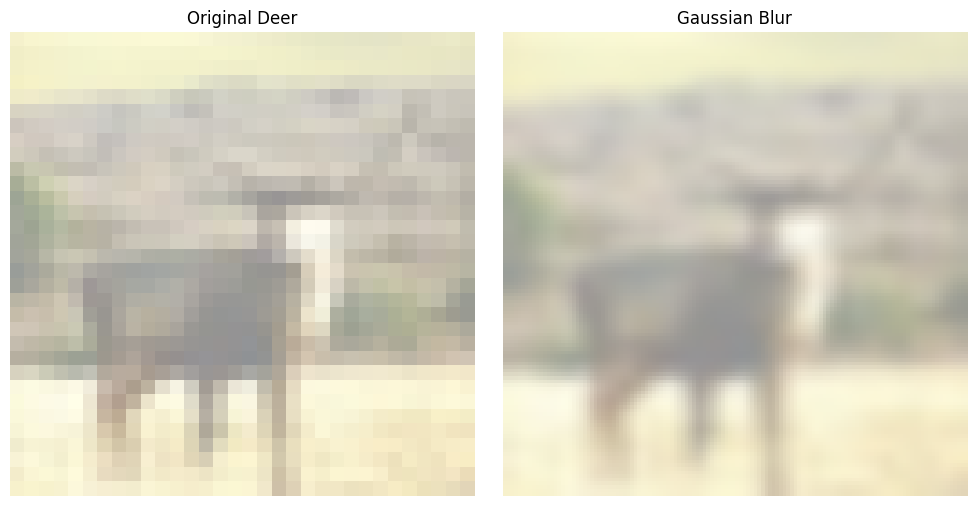

In [ ]:

print("\n5. GaussianBlur")
deer_img, deer_label = class_examples['deer']
deer_pil = transforms.ToPILImage()(deer_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
imshow(deer_img, 'Original Deer', axes[0])
imshow(transform_blur(deer_pil), 'Gaussian Blur', axes[1])
plt.tight_layout()
plt.show()

В домашней работе я применила пять различных методов преобразований: горизонтальное отражение, изменение цветовых характеристик, вращение, аффинные преобразования и гауссово размытие.

---

Каждую аугментацию я продемонстрировала на, на мой взгляд, самых подходяших классах, чтобы показатать эффективность использования. Мы видим, что грамотное применение аугментаций значительно увеличивает вариативность данных,в дальнейшем поможет бороться с переобучением. Особенно важно правильно подбирать параметры в преобразованиях, чтобы объекты на изображениях оставались узнаваемыми и понятными, при этом мы смогли добавить в наш датасет еще реалистичные картинки.